In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


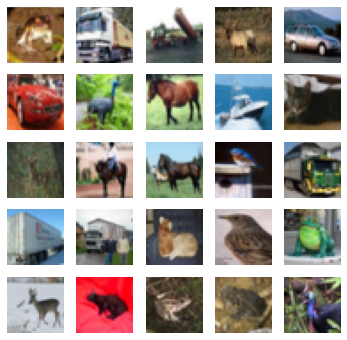

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

plt.show()

In [ ]:
import numpy as np

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_tetst = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), 
               kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = cnn.fit(x_train, y_train, batch_size=128, epochs=30, 
                   validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 36s 19ms/step - loss: 1.6277 - accuracy: 0.4065 - val_loss: 156.7506 - val_accuracy: 0.4562
Epoch 2/30
391/391 [==============================] - 7s 17ms/step - loss: 1.2908 - accuracy: 0.5399 - val_loss: 150.9823 - val_accuracy: 0.4927
Epoch 3/30
391/391 [==============================] - 7s 17ms/step - loss: 1.1569 - accuracy: 0.5907 - val_loss: 158.3573 - val_accuracy: 0.4965
Epoch 4/30
391/391 [==============================] - 7s 17ms/step - loss: 1.0734 - accuracy: 0.6210 - val_loss: 141.2965 - val_accuracy: 0.5324
Epoch 5/30
391/391 [==============================] - 7s 17ms/step - loss: 1.0210 - accuracy: 0.6380 - val_loss: 154.0514 - val_accuracy: 0.4892
Epoch 6/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9704 - accuracy: 0.6574 - val_loss: 121.6277 - val_accuracy: 0.5655
Epoch 7/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9249 - accuracy: 0.6723 - val_loss: 130.5641 - val_a

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 296.7615 - accuracy: 0.5310


[296.76153564453125, 0.531000018119812]

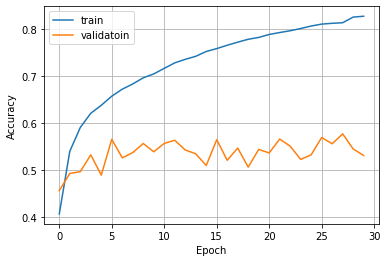

In [ ]:
import matplotlib.pyplot as plt

plt.plot(training.history['accuracy'], label='train')
plt.plot(training.history['val_accuracy'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

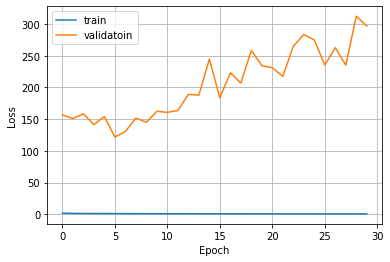

In [ ]:
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

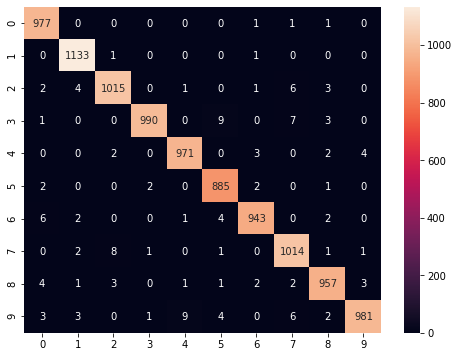

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))

p = cnn.predict(x_test)
c = confusion_matrix(y_test, np.argmax(p, axis=1))

sns.heatmap(c, annot=True, fmt='d')
plt.show()

In [ ]:
print(c)
print('\n')

for i in range(10):
  print(('%d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(c[i]), np.sum(c[i]), np.max(c[i])/np.sum(c[i])))

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   2    4 1015    0    1    0    1    6    3    0]
 [   1    0    0  990    0    9    0    7    3    0]
 [   0    0    2    0  971    0    3    0    2    4]
 [   2    0    0    2    0  885    2    0    1    0]
 [   6    2    0    0    1    4  943    0    2    0]
 [   0    2    8    1    0    1    0 1014    1    1]
 [   4    1    3    0    1    1    2    2  957    3]
 [   3    3    0    1    9    4    0    6    2  981]]


0	 (977/980)	accuracy = 0.997
1	 (1133/1135)	accuracy = 0.998
2	 (1015/1032)	accuracy = 0.984
3	 (990/1010)	accuracy = 0.980
4	 (971/982)	accuracy = 0.989
5	 (885/892)	accuracy = 0.992
6	 (943/958)	accuracy = 0.984
7	 (1014/1028)	accuracy = 0.986
8	 (957/974)	accuracy = 0.983
9	 (981/1009)	accuracy = 0.972
